In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
csv_path  = '/content/drive/My Drive/merged.csv'

In [ ]:
import pandas as pd
df =pd.read_csv(csv_path)


In [ ]:
df.head(20)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0
5,1990-01,ANG MO KIO,3 ROOM,211,ANG MO KIO AVE 3,01 TO 03,67.0,NEW GENERATION,1977,46000.0
6,1990-01,ANG MO KIO,3 ROOM,202,ANG MO KIO AVE 3,07 TO 09,67.0,NEW GENERATION,1977,42000.0
7,1990-01,ANG MO KIO,3 ROOM,235,ANG MO KIO AVE 3,10 TO 12,67.0,NEW GENERATION,1977,38000.0
8,1990-01,ANG MO KIO,3 ROOM,235,ANG MO KIO AVE 3,04 TO 06,67.0,NEW GENERATION,1977,40000.0
9,1990-01,ANG MO KIO,3 ROOM,232,ANG MO KIO AVE 3,01 TO 03,67.0,NEW GENERATION,1977,47000.0


Text(0.5, 1.0, 'Heatmap with resale_price, lease_commence_date, floor_area_sqm, storey_range')

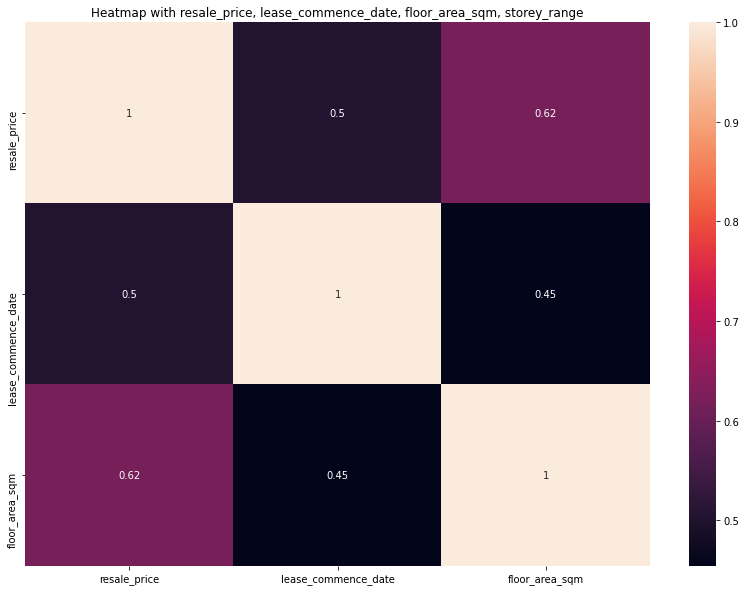

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(14, 10))
sns.heatmap(df[["resale_price", "lease_commence_date", "floor_area_sqm", "storey_range"]].corr(), annot=True)
plt.title("Heatmap with resale_price, lease_commence_date, floor_area_sqm, storey_range")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840128 entries, 0 to 840127
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                840128 non-null  object 
 1   town                 840128 non-null  object 
 2   flat_type            840128 non-null  object 
 3   block                840128 non-null  object 
 4   street_name          840128 non-null  object 
 5   storey_range         840128 non-null  object 
 6   floor_area_sqm       840128 non-null  float64
 7   flat_model           840128 non-null  object 
 8   lease_commence_date  840128 non-null  int64  
 9   resale_price         840128 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 64.1+ MB


In [ ]:
df.isna().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
dtype: int64

In [ ]:
df['storey_range'].value_counts()

04 TO 06    212828
07 TO 09    191903
01 TO 03    171381
10 TO 12    162655
13 TO 15     53516
16 TO 18     20096
19 TO 21      9709
22 TO 24      6274
01 TO 05      2700
25 TO 27      2665
06 TO 10      2474
11 TO 15      1259
28 TO 30      1124
31 TO 33       319
34 TO 36       308
37 TO 39       301
16 TO 20       265
40 TO 42       147
21 TO 25        92
26 TO 30        39
46 TO 48        28
43 TO 45        26
49 TO 51        10
36 TO 40         7
31 TO 35         2
Name: storey_range, dtype: int64

In [ ]:
df = df.drop(df[df.storey_range =='storey_range'].index)
df['storey'] = df.apply (lambda row: (int(row['storey_range'][0:2]) + int(row['storey_range'][-2:]))/2, axis=1)

In [ ]:
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,storey
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,11.0
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,5.0
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,11.0
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,8.0
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,5.0


In [ ]:
df['flat_type'].value_counts()

4 ROOM              314909
3 ROOM              275514
5 ROOM              174077
EXECUTIVE            63789
2 ROOM               10049
1 ROOM                1279
MULTI GENERATION       279
MULTI-GENERATION       232
Name: flat_type, dtype: int64

In [ ]:
def get_type(s):
  if s[0]>='1' and s[0]<='5':
    return int(s[0])
  elif s=='EXECUTIVE':
    return 6
  else:
    return 7
  

In [ ]:
df['type'] = df.apply (lambda row: get_type(row['flat_type']), axis=1)

In [ ]:
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,storey,type
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,11.0,1
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,5.0,1
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,11.0,1
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,8.0,1
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,5.0,3


In [ ]:
df['town'].value_counts()

TAMPINES           74115
YISHUN             64047
BEDOK              62143
JURONG WEST        61457
WOODLANDS          59405
ANG MO KIO         48785
HOUGANG            46157
BUKIT BATOK        40788
CHOA CHU KANG      33968
BUKIT MERAH        31033
PASIR RIS          30753
TOA PAYOH          28951
QUEENSTOWN         26374
CLEMENTI           26116
GEYLANG            26032
SENGKANG           25216
BUKIT PANJANG      24835
KALLANG/WHAMPOA    24417
JURONG EAST        23156
SERANGOON          21391
BISHAN             19845
PUNGGOL            13589
SEMBAWANG          11222
MARINE PARADE       7480
CENTRAL AREA        6466
BUKIT TIMAH         2323
LIM CHU KANG          64
Name: town, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 840128 entries, 0 to 840127
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                840128 non-null  object 
 1   town                 840128 non-null  object 
 2   flat_type            840128 non-null  object 
 3   block                840128 non-null  object 
 4   street_name          840128 non-null  object 
 5   storey_range         840128 non-null  object 
 6   floor_area_sqm       840128 non-null  float64
 7   flat_model           840128 non-null  object 
 8   lease_commence_date  840128 non-null  int64  
 9   resale_price         840128 non-null  float64
 10  storey               840128 non-null  float64
 11  type                 840128 non-null  int64  
dtypes: float64(3), int64(2), object(7)
memory usage: 83.3+ MB


In [ ]:
df = df.drop(['block', 'street_name','storey_range','flat_type','flat_model'], axis =1)
# df = df.drop(['flat_model'], axis =1)

In [ ]:
df.head()

,month,town,floor_area_sqm,lease_commence_date,resale_price,storey,type
0,1990-01,ANG MO KIO,31.0,1977,9000.0,11.0,1
1,1990-01,ANG MO KIO,31.0,1977,6000.0,5.0,1
2,1990-01,ANG MO KIO,31.0,1977,8000.0,11.0,1
3,1990-01,ANG MO KIO,31.0,1977,6000.0,8.0,1
4,1990-01,ANG MO KIO,73.0,1976,47200.0,5.0,3


In [ ]:
import types
import numpy as np
def to_numeric(s):
  try:
    return int(s)
  except (ValueError): 
    return np.nan



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 840128 entries, 0 to 840127
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                840128 non-null  object 
 1   town                 840128 non-null  object 
 2   floor_area_sqm       840128 non-null  float64
 3   lease_commence_date  840128 non-null  int64  
 4   resale_price         840128 non-null  float64
 5   storey               840128 non-null  float64
 6   type                 840128 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 51.3+ MB


In [ ]:
df.head()

,month,town,floor_area_sqm,lease_commence_date,resale_price,storey,type
0,1990-01,ANG MO KIO,31.0,1977,9000.0,11.0,1
1,1990-01,ANG MO KIO,31.0,1977,6000.0,5.0,1
2,1990-01,ANG MO KIO,31.0,1977,8000.0,11.0,1
3,1990-01,ANG MO KIO,31.0,1977,6000.0,8.0,1
4,1990-01,ANG MO KIO,73.0,1976,47200.0,5.0,3


In [ ]:

df['floor_area_sqm'] = pd.to_numeric(df['floor_area_sqm'])


In [ ]:
df['lease_commence_date'] = df.apply (lambda row: to_numeric(row['lease_commence_date']), axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 840128 entries, 0 to 840127
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                840128 non-null  object 
 1   town                 840128 non-null  object 
 2   floor_area_sqm       840128 non-null  float64
 3   lease_commence_date  840128 non-null  int64  
 4   resale_price         840128 non-null  float64
 5   storey               840128 non-null  float64
 6   type                 840128 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 51.3+ MB


In [ ]:
df.head()

,month,town,floor_area_sqm,lease_commence_date,resale_price,storey,type
0,1990-01,ANG MO KIO,31.0,1977,9000.0,11.0,1
1,1990-01,ANG MO KIO,31.0,1977,6000.0,5.0,1
2,1990-01,ANG MO KIO,31.0,1977,8000.0,11.0,1
3,1990-01,ANG MO KIO,31.0,1977,6000.0,8.0,1
4,1990-01,ANG MO KIO,73.0,1976,47200.0,5.0,3


In [ ]:
def getYear(s):
  return int(s[0:4])
getYear('2015-09')

2015

In [ ]:
df['year'] = df.apply(lambda row: getYear(row['month']),axis = 1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 840128 entries, 0 to 840127
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                840128 non-null  object 
 1   town                 840128 non-null  object 
 2   floor_area_sqm       840128 non-null  float64
 3   lease_commence_date  840128 non-null  int64  
 4   resale_price         840128 non-null  float64
 5   storey               840128 non-null  float64
 6   type                 840128 non-null  int64  
 7   year                 840128 non-null  int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 57.7+ MB


In [ ]:
df = df.drop(['month'], axis = 1)

In [ ]:
df['town'].value_counts()

TAMPINES           74115
YISHUN             64047
BEDOK              62143
JURONG WEST        61457
WOODLANDS          59405
ANG MO KIO         48785
HOUGANG            46157
BUKIT BATOK        40788
CHOA CHU KANG      33968
BUKIT MERAH        31033
PASIR RIS          30753
TOA PAYOH          28951
QUEENSTOWN         26374
CLEMENTI           26116
GEYLANG            26032
SENGKANG           25216
BUKIT PANJANG      24835
KALLANG/WHAMPOA    24417
JURONG EAST        23156
SERANGOON          21391
BISHAN             19845
PUNGGOL            13589
SEMBAWANG          11222
MARINE PARADE       7480
CENTRAL AREA        6466
BUKIT TIMAH         2323
LIM CHU KANG          64
Name: town, dtype: int64

In [ ]:
df.head(10)

,town,floor_area_sqm,lease_commence_date,resale_price,storey,type,year
0,ANG MO KIO,31.0,1977,9000.0,11.0,1,1990
1,ANG MO KIO,31.0,1977,6000.0,5.0,1,1990
2,ANG MO KIO,31.0,1977,8000.0,11.0,1,1990
3,ANG MO KIO,31.0,1977,6000.0,8.0,1,1990
4,ANG MO KIO,73.0,1976,47200.0,5.0,3,1990
5,ANG MO KIO,67.0,1977,46000.0,2.0,3,1990
6,ANG MO KIO,67.0,1977,42000.0,8.0,3,1990
7,ANG MO KIO,67.0,1977,38000.0,11.0,3,1990
8,ANG MO KIO,67.0,1977,40000.0,5.0,3,1990
9,ANG MO KIO,67.0,1977,47000.0,2.0,3,1990


Text(0.5, 1.0, 'Heatmap with resale_price, lease_commence_date, floor_area_sqm, storey, type, year')

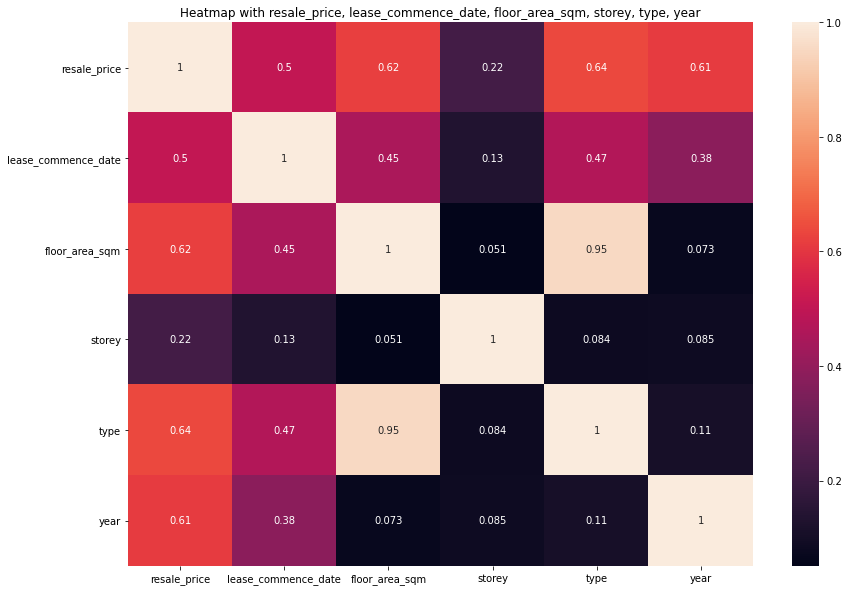

In [ ]:
plt.figure(figsize=(14, 10))
sns.heatmap(df[["resale_price", "lease_commence_date", "floor_area_sqm", "storey", "type", "year"]].corr(), annot=True)
plt.title("Heatmap with resale_price, lease_commence_date, floor_area_sqm, storey, type, year")

In [ ]:
!pip install catboost

     |████████████████████████████████| 67.3MB 56kB/s 


In [ ]:
from catboost import CatBoostRegressor

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df,test_size = 0.1,shuffle=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 840128 entries, 0 to 840127
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   town                 840128 non-null  object 
 1   floor_area_sqm       840128 non-null  float64
 2   lease_commence_date  840128 non-null  int64  
 3   resale_price         840128 non-null  float64
 4   storey               840128 non-null  float64
 5   type                 840128 non-null  int64  
 6   year                 840128 non-null  int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 51.3+ MB


In [ ]:
features = ['town', 'floor_area_sqm', 'lease_commence_date', 'storey','type', 'year']
cat_features = ['town']
label = ['resale_price']

In [ ]:
X_train = train[features]
y_train = train[label]
X_test = test[features]
y_test = test[label]

In [ ]:
df['resale_price'].value_counts()

300000.0    6537
280000.0    6356
250000.0    6197
350000.0    6129
320000.0    6077
            ... 
290777.0       1
290988.0       1
291100.0       1
291180.0       1
264250.0       1
Name: resale_price, Length: 8594, dtype: int64

In [ ]:
df.isna().sum()

town                   0
floor_area_sqm         0
lease_commence_date    0
resale_price           0
storey                 0
type                   0
year                   0
dtype: int64

In [ ]:
df.head(10)


,town,floor_area_sqm,lease_commence_date,resale_price,storey,type,year
0,ANG MO KIO,31.0,1977,9000.0,11.0,1,1990
1,ANG MO KIO,31.0,1977,6000.0,5.0,1,1990
2,ANG MO KIO,31.0,1977,8000.0,11.0,1,1990
3,ANG MO KIO,31.0,1977,6000.0,8.0,1,1990
4,ANG MO KIO,73.0,1976,47200.0,5.0,3,1990
5,ANG MO KIO,67.0,1977,46000.0,2.0,3,1990
6,ANG MO KIO,67.0,1977,42000.0,8.0,3,1990
7,ANG MO KIO,67.0,1977,38000.0,11.0,3,1990
8,ANG MO KIO,67.0,1977,40000.0,5.0,3,1990
9,ANG MO KIO,67.0,1977,47000.0,2.0,3,1990


In [ ]:
test

,town,floor_area_sqm,lease_commence_date,resale_price,storey,type,year
401717,HOUGANG,104.0,1992,220000.0,5.0,4,2003
345030,HOUGANG,105.0,1989,252000.0,8.0,4,2001
629596,BEDOK,118.0,1978,620000.0,23.0,5,2010
183645,SERANGOON,146.0,1986,540000.0,8.0,6,1998
343056,TOA PAYOH,67.0,1970,146000.0,14.0,3,2001
...,...,...,...,...,...,...,...
526225,PUNGGOL,110.0,2003,302000.0,17.0,5,2007
546509,KALLANG/WHAMPOA,59.0,1973,184000.0,14.0,3,2008
284702,BEDOK,91.0,1978,239000.0,11.0,4,1999
623184,PUNGGOL,110.0,2003,480000.0,11.0,5,2010


In [ ]:
df.shape

(840128, 7)

In [ ]:
model = CatBoostRegressor(iterations=200,
                          learning_rate=0.2,
                          depth=7)
model.fit(X_train, y_train, cat_features)

0:	learn: 127404.9888427	total: 485ms	remaining: 1m 36s
1:	learn: 109516.1999198	total: 835ms	remaining: 1m 22s
2:	learn: 95984.2471874	total: 1.19s	remaining: 1m 18s
3:	learn: 85656.9330189	total: 1.59s	remaining: 1m 18s
4:	learn: 78061.7033639	total: 1.97s	remaining: 1m 16s
5:	learn: 72149.8635304	total: 2.34s	remaining: 1m 15s
6:	learn: 67604.6202852	total: 2.76s	remaining: 1m 16s
7:	learn: 63981.3376596	total: 3.1s	remaining: 1m 14s
8:	learn: 59007.3549191	total: 3.36s	remaining: 1m 11s
9:	learn: 56048.6103981	total: 3.63s	remaining: 1m 8s
10:	learn: 54146.6905465	total: 3.94s	remaining: 1m 7s
11:	learn: 52415.2245514	total: 4.25s	remaining: 1m 6s
12:	learn: 51229.2860150	total: 4.62s	remaining: 1m 6s
13:	learn: 48417.2096757	total: 4.95s	remaining: 1m 5s
14:	learn: 47547.2712079	total: 5.27s	remaining: 1m 5s
15:	learn: 46796.9306139	total: 5.64s	remaining: 1m 4s
16:	learn: 44898.9165628	total: 5.93s	remaining: 1m 3s
17:	learn: 44242.5418840	total: 6.22s	remaining: 1m 2s
18:	learn:

In [ ]:
predict =model.predict(X_test)

In [ ]:
df['resale_price'].describe()

count    8.401280e+05
mean     2.966238e+05
std      1.508606e+05
min      5.000000e+03
25%      1.830000e+05
50%      2.780000e+05
75%      3.870000e+05
max      1.258000e+06
Name: resale_price, dtype: float64

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(y_test, predict, squared=False)

28156.313420971495

In [ ]:
y_true = y_test.to_numpy().squeeze()
relative_error = abs(y_true-predict)/y_true

In [ ]:
#MAPE
np.mean(relative_error)

0.07780793120924125

In [ ]:
np.median(relative_error)

0.05691009985678197

In [ ]:
# save_model(model,"/content/drive/My Drive/model")
model.save_model("/content/drive/My Drive/model_cat")

In [ ]:
from catboost import CatBoostRegressor
model_from_file = CatBoostRegressor()      # parameters not required.
model_from_file.load_model("/content/drive/My Drive/model_cat")

In [ ]:
data = [["JURONG WEST", 100, 1999, 10, 3, 1996],["JURONG WEST", 100, 1999, 10, 3, 1996]]
predict_df = pd.DataFrame(data, columns = ['town','floor_area_sqm','lease_commence_date','storey','type','year'])  




model.predict(predict_df)


array([235901.11983011, 235901.11983011])

In [ ]:
model_from_file.predict(predict_df)

array([235901.11983011, 235901.11983011])